# Demo: Overfitting, Weight-Regularization

In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

$w_\mathrm{new} = w - \alpha\nabla J(w)$

### Plot polynomial

Here we plot the polynomial curve $f(x) = 5x^3 + 4x^2 - 2x - 0.5$.

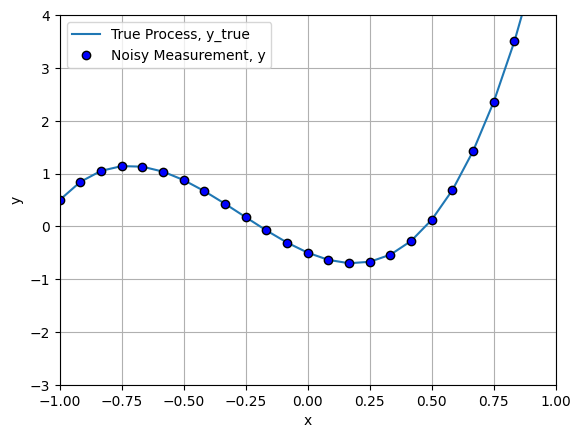

In [22]:
nsamp = 25 # number of samples taken
p = np.array([5,4,-2,-.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y_true,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

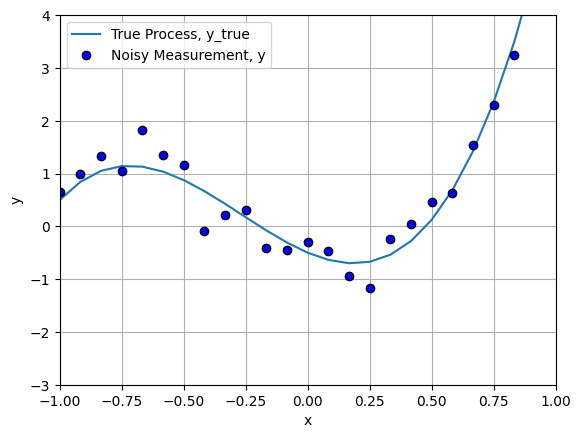

In [23]:
nsamp = 25 # number of samples taken
p = np.array([5,4,-2,-.5]) # true coefficients
var = 0.1 # noise variance

# we'll take a set of measurements uniformly
x = np.linspace(-1,1,nsamp)
y_true = np.polyval(p,x)
# noisy measurement, ym. use sqrt(var) as numpy normal standard deviation
y = y_true + np.random.normal(0, np.sqrt(var), nsamp)

plt.plot(x,y_true)
# we can force a scatter plot in plt.plot by making the third argument 'o'
plt.plot(x,y,'ob',markeredgecolor='black');
plt.grid();
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([-1,1])
plt.ylim([-3,4])
plt.legend(['True Process, y_true','Noisy Measurement, y']);

In [24]:
# train test validation split
ntrain = 15
nval = 5
ntest = 5

inds = np.random.permutation(nsamp)

train_choices = inds[:ntrain]
val_choices = inds[ntrain:ntrain+nval]
test_choices = inds[ntrain+nval:]

xtrain, ytrain = x[train_choices], y[train_choices]
xval, yval     = x[val_choices], y[val_choices]
xtest, ytest   = x[test_choices], y[test_choices]

### Design Matrix

We have the design matrix as $D = \begin{bmatrix}
1 & x_1 & x_1^2 & x_1^3 & \cdots & x_1^{M}\\
1 & x_2 & x_2^2 & x_2^3 & \cdots & x_2^{M}\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\ 
1 & x_n & x_n^2 & x_n^3 & \cdots & x_n^{M}
\end{bmatrix}$

- Complete the design matrix and set M = 25, the shape of the design matrix should be (15, 26)

In [25]:
ones = np.ones((15, 1))
xtrain_reshaped = xtrain.reshape((-1, 1))
X = np.hstack((ones, xtrain_reshaped))
x_train_reshaped_squared = xtrain_reshaped ** 2

np.hstack((X, x_train_reshaped_squared))

array([[ 1.        , -0.5       ,  0.25      ],
       [ 1.        ,  0.58333333,  0.34027778],
       [ 1.        , -0.58333333,  0.34027778],
       [ 1.        ,  0.25      ,  0.0625    ],
       [ 1.        ,  0.33333333,  0.11111111],
       [ 1.        , -0.08333333,  0.00694444],
       [ 1.        ,  0.08333333,  0.00694444],
       [ 1.        ,  0.83333333,  0.69444444],
       [ 1.        , -0.16666667,  0.02777778],
       [ 1.        , -1.        ,  1.        ],
       [ 1.        , -0.41666667,  0.17361111],
       [ 1.        , -0.83333333,  0.69444444],
       [ 1.        ,  0.66666667,  0.44444444],
       [ 1.        , -0.91666667,  0.84027778],
       [ 1.        , -0.75      ,  0.5625    ]])

In [26]:
# forming the design matrix
# features x, model order M

def design_matrix(x, M):
    # TODO
    # To-do
    
    # 1. create the empty array of ones
    Design_Matrix = np.ones((x.shape[0],M+1)) # use the np.ones function
    
    # 2. use a for loop to populate the Design_Matrix columnwise
    for j in range(M):
        Design_Matrix[:,j+1] = x**(j+1)#provide an expression for each column of Design_Matrix
    
    
    return Design_Matrix


M = 10
Xtrain = design_matrix(xtrain, M)
Xval = design_matrix(xval,M)
Xtest = design_matrix(xtest,M)
print(Xtrain.shape, )

(15, 11)


Train RMSE = 1.5003
Test RMSE = 22.6064


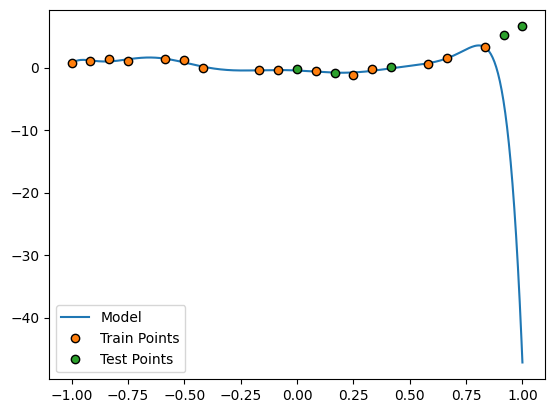

w = 
[[  -0.48]
 [  -1.77]
 [  -8.18]
 [  27.09]
 [ 114.28]
 [-162.19]
 [-383.78]
 [ 354.41]
 [ 570.25]
 [-241.43]
 [-315.36]]


In [27]:
from sklearn import linear_model

# TODO
# fit the polynomial model using linear regression 
# 1. Use 'reg' as name for your regressor and set fit_intercept = False
reg = linear_model.LinearRegression(fit_intercept=False)
reg.fit(Xtrain, ytrain.reshape((-1, 1)))
w = reg.coef_


# print the training error RMSE
# 1. generate the predictions y_train_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)
yhat = reg.predict(Xtrain)
RMSE = np.sqrt(np.mean((ytrain-yhat)**2) )
print("Train RMSE = %.4f" % RMSE)


# print the test error RMS
# 1. generate the predictions y_test_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)
Xtest = design_matrix(xtest, M)
yhat = reg.predict(Xtest)
RMSE = np.sqrt( np.mean((ytest-yhat)**2) )
print("Test RMSE = %.4f" % RMSE)

# see what happens to the error values above as M is set to a high number

# plotting
x_line = np.linspace(-1,1,500)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)

plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,4])
plt.legend(['Model','Train Points', 'Test Points'])
plt.show()

w = reg.coef_
print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

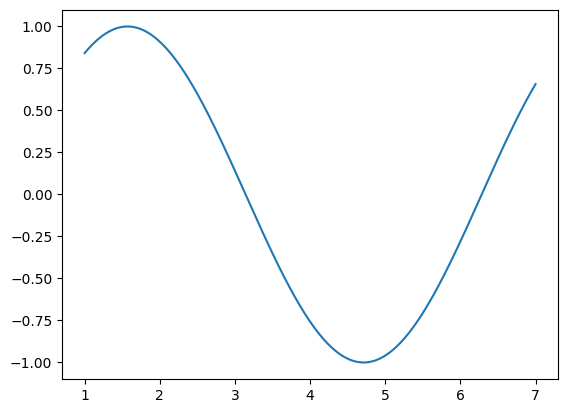

In [28]:
# x = np.array([1, 2, 3, 4, 5, 6, 7])
x = np.linspace(1, 7, 500)
y = np.sin(x)
plt.plot(x, y)

### weight based regularization

- Lasso: L1 norm regularizer $\displaystyle\frac{1}{2n_\mathrm{samples}}\|y - Xw\|^2_2 + \alpha\|w\|_1$


- Ridge: L2 norm regularizer $\displaystyle\|y - Xw\|^2_2 + \alpha\|w\|^2_2$

Train RMSE = 0.3671
Validation RMSE = 0.4743
Test RMSE = 0.7441


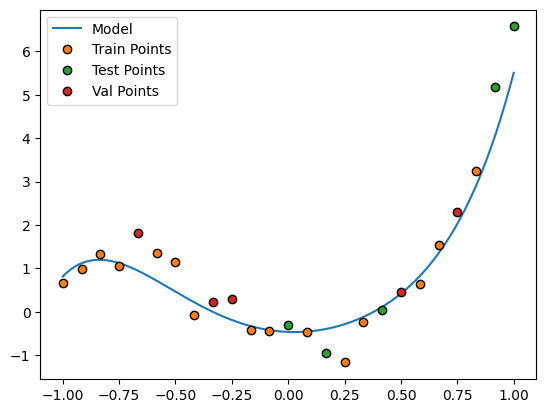

w = 
[[ 0.  ]
 [-0.2 ]
 [ 3.62]
 [ 0.  ]
 [ 0.  ]
 [ 2.55]
 [-0.  ]
 [ 0.  ]
 [-0.  ]
 [ 0.  ]
 [-0.  ]]


In [38]:
# TODO

# Using the following models to fit the data
reg = linear_model.Lasso(alpha=.02, fit_intercept=True)

reg.fit(Xtrain, ytrain.reshape((-1, 1)))

#***********************************************************************************#

# print the training error RMSE
# 1. generate the predictions y_train_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)

y_train_pred = reg.predict(Xtrain)
RMSE = np.sqrt(np.mean((ytrain-y_train_pred)**2) )
print("Train RMSE = %.4f" % RMSE)

#***********************************************************************************#

# print the validation error RMSE
# 1. generate the predictions y_val_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)

y_val_pred = reg.predict(Xval)
RMSE = np.sqrt(np.mean((yval-y_val_pred)**2) )
print("Validation RMSE = %.4f" % RMSE)

#***********************************************************************************#

# print the test error RMSE
# 1. generate the predictions y_test_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)

y_test_pred = reg.predict(Xtest)
RMSE = np.sqrt(np.mean((ytest-y_test_pred)**2) )
print("Test RMSE = %.4f" % RMSE)

#***********************************************************************************#


# see what happens to the error values above as M is set to a high number
# print(f"The train error is, {mse_train:.3f}")
# print(f"The validation error is, {mse_val:.3f}")
# print(f"The test error is, {mse_test:.3f}")


# plotting

x_line = np.linspace(-1,1,500)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)


plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.plot(xval,yval,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points', 'Val Points'])
plt.show()

w = reg.coef_
print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))

Train RMSE = 1.4419
Validation RMSE = 1.2345
Test RMSE = 4.4430


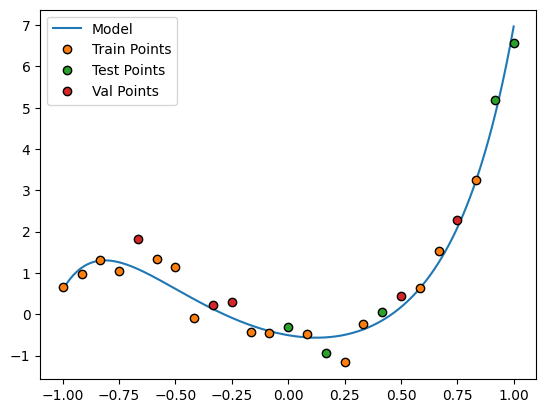

w = 
[[-0.51]
 [-0.93]
 [ 3.38]
 [ 1.54]
 [ 0.88]
 [ 1.35]
 [ 0.04]
 [ 0.83]
 [-0.06]
 [ 0.38]
 [ 0.06]]


In [39]:
# TODO

# Using the following models to fit the data
reg = linear_model.Ridge(alpha=.05, fit_intercept=False)

reg.fit(Xtrain, ytrain.reshape((-1, 1)))

#***********************************************************************************#

# print the training error RMSE
# 1. generate the predictions y_train_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)

y_train_pred = reg.predict(Xtrain)
RMSE = np.sqrt(np.mean((ytrain-y_train_pred)**2) )
print("Train RMSE = %.4f" % RMSE)

#***********************************************************************************#

# print the validation error RMSE
# 1. generate the predictions y_val_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)

y_val_pred = reg.predict(Xval)
RMSE = np.sqrt(np.mean((yval-y_val_pred)**2) )
print("Validation RMSE = %.4f" % RMSE)

#***********************************************************************************#

# print the test error RMSE
# 1. generate the predictions y_test_pred
# 2. use the skearn metric MSE to calculate RMSE (note: pass squared=False)

y_test_pred = reg.predict(Xtest)
RMSE = np.sqrt(np.mean((ytest-y_test_pred)**2) )
print("Test RMSE = %.4f" % RMSE)

#***********************************************************************************#


# see what happens to the error values above as M is set to a high number
# print(f"The train error is, {mse_train:.3f}")
# print(f"The validation error is, {mse_val:.3f}")
# print(f"The test error is, {mse_test:.3f}")


# plotting

x_line = np.linspace(-1,1,500)
X_line = design_matrix(x_line, M)
y_line = reg.predict(X_line)


plt.figure()
plt.plot(x_line, y_line)
plt.plot(xtrain,ytrain,'o',markeredgecolor='black')
plt.plot(xtest,ytest,'o',markeredgecolor='black')
plt.plot(xval,yval,'o',markeredgecolor='black')
# plt.xlim([-1,1])
# plt.ylim([-3,3])
plt.legend(['Model','Train Points', 'Test Points', 'Val Points'])
plt.show()

w = reg.coef_
print("w = ")
with np.printoptions(precision=2, suppress=True):
    print(w.reshape(-1,1))